## Importing Data Science Libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Reading the DataSet
df = pd.read_csv('/content/drive/MyDrive/0_Hackathon_SBSSU/cancer cd/breast-cancer-wisconsin.data',na_values="?")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Overviewing Data
df.sample(5)

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,result
492,1133991,4,1,1,1,1,1.0,2,1,1,2
258,1198641,3,1,1,1,2,1.0,3,1,1,2
70,1121919,5,1,3,1,2,1.0,2,1,1,2
513,1304595,3,1,1,1,1,1.0,2,1,1,2
224,1227210,10,5,5,6,3,10.0,7,9,2,4


In [ ]:
# Replacing 'id' column because we don't need that
df = df.drop(['id'],axis=1)

# Since our dataset contains 'Object' type Data, we need to convert the data to integer.
df['result'].replace(to_replace=2,value='Benign')
df['result'].replace(to_replace=4,value='Malignant')
df['result'].value_counts()

2    458
4    241
Name: result, dtype: int64

In [ ]:
df.sample(5)

,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,result
75,1,1,2,1,2,2.0,4,2,1,2
668,5,7,4,1,6,1.0,7,10,3,4
80,2,2,2,1,1,1.0,7,1,1,2
238,8,10,10,8,6,9.0,3,10,10,4
111,8,6,4,3,5,9.0,3,1,1,4


## Checking for Null Values in our Dataset

In [ ]:
df.isnull().sum()

clump_thickness                 0
cell_size                       0
cell_shape                      0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitosis                         0
result                          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clump_thickness              699 non-null    int64  
 1   cell_size                    699 non-null    int64  
 2   cell_shape                   699 non-null    int64  
 3   marginal_adhesion            699 non-null    int64  
 4   single_epithelial_cell_size  699 non-null    int64  
 5   bare_nuclei                  683 non-null    float64
 6   bland_chromatin              699 non-null    int64  
 7   normal_nucleoli              699 non-null    int64  
 8   mitosis                      699 non-null    int64  
 9   result                       699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [ ]:
# Checking for unique value in 'bare_nuclei'
df['bare_nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [ ]:
df.corr()

,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,result
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
single_epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
mitosis,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170
result,0.716001,0.817904,0.818934,0.696800,0.682785,0.822696,0.756616,0.712244,0.423170,1.000000


In [ ]:
df.isnull().mean()*100

clump_thickness                0.000000
cell_size                      0.000000
cell_shape                     0.000000
marginal_adhesion              0.000000
single_epithelial_cell_size    0.000000
bare_nuclei                    2.288984
bland_chromatin                0.000000
normal_nucleoli                0.000000
mitosis                        0.000000
result                         0.000000
dtype: float64

In [ ]:
# Now we are going to Start the spliting for the Dataset
x=df.drop(['result'],axis=1)
y=df['result']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=19)

In [ ]:
# Calculating the Mean and Median and whose value will be accurate, we will impute that in the missing value place.
mean_bn = xtrain['bare_nuclei'].mean()
median_bn = xtrain['bare_nuclei'].median()

In [ ]:
# Applying imputation on the Training Dataset
xtrain['bn_median'] = xtrain['bare_nuclei'].fillna(median_bn)
xtrain['bn_mean'] = xtrain['bare_nuclei'].fillna(mean_bn)

In [ ]:
xtrain.sample(5)

,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,bn_median,bn_mean
692,3,1,1,1,2,1.0,1,1,1,1.0,1.0
138,4,1,2,1,2,1.0,2,1,1,1.0,1.0
72,1,3,3,2,2,1.0,7,2,1,1.0,1.0
328,8,10,3,2,6,4.0,3,10,1,4.0,4.0
550,3,1,1,1,2,1.0,2,1,1,1.0,1.0


In [ ]:
# Checking Variance for Original as well as New Columns.
print('Original Bare_Nuclei variable variance: ', xtrain['bare_nuclei'].var())
print('Bare Nuclei Variance after median imputation: ', xtrain['bn_median'].var())
print('Bare Nuclei Variance after mean imputation: ', xtrain['bn_mean'].var())

Original Bare_Nuclei variable variance:  13.116057616971695
Bare Nuclei Variance after median imputation:  12.960278531171253
Bare Nuclei Variance after mean imputation:  12.833991861768002


## Plotting the Data to check for Normal Distribution of the Column

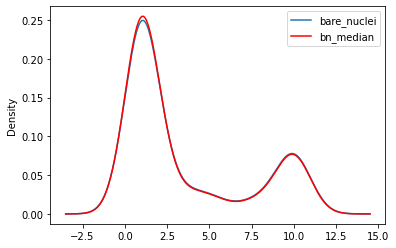

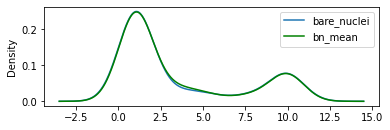

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
xtrain['bare_nuclei'].plot(kind='kde', ax=ax)

# variable imputed with the median
xtrain['bn_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


fig = plt.figure()
ax = fig.add_subplot(211)

xtrain['bare_nuclei'].plot(kind='kde', ax=ax)
# variable imputed with the mean
xtrain['bn_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

here we see that the median column is showing the best rresult

## Checking for the Outliers in the Data

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


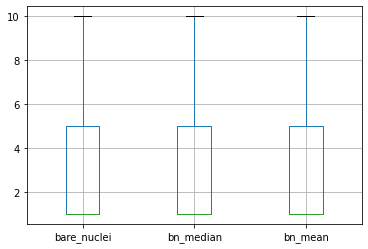

In [ ]:
xtrain[['bare_nuclei', 'bn_median', 'bn_mean']].boxplot()

Since there is no Outlier in the Data, we can use the median column

# Now Just Imputing Median Value

In [ ]:
xtrain['bn_median'] = xtrain['bare_nuclei'].fillna(median_bn)
xtest['bn_median'] = xtest['bare_nuclei'].fillna(median_bn)


In [ ]:
xtrain.shape, xtest.shape

((559, 11), (140, 10))

In [ ]:
xtrain.sample(5)

,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,bn_median,bn_mean
263,10,4,4,10,6,10.0,5,5,1,10.0,10.0
179,5,3,3,3,6,10.0,3,1,1,10.0,10.0
629,4,1,1,1,2,1.0,1,1,1,1.0,1.0
299,9,1,2,6,4,10.0,7,7,2,10.0,10.0
551,1,1,1,1,2,1.0,3,1,1,1.0,1.0


In [ ]:
xtrain = xtrain.drop(['bn_mean','bare_nuclei'],axis=1)
xtest = xtest.drop(['bare_nuclei'],axis=1)

In [ ]:
xtrain.columns , xtest.shape

(Index(['clump_thickness', 'cell_size', 'cell_shape', 'marginal_adhesion',
        'single_epithelial_cell_size', 'bland_chromatin', 'normal_nucleoli',
        'mitosis', 'bn_median'],
       dtype='object'), (140, 9))

# Now Training a Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
log = LogisticRegression()
dec = DecisionTreeClassifier()
rf = RandomForestClassifier()
sv = SVC()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [ ]:
log.fit(xtrain,ytrain)
dec.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)
sv.fit(xtrain,ytrain)

SVC()

In [ ]:
logpred = log.predict(xtest)
decpred = dec.predict(xtest)
rfpred =rf.predict(xtest)
svpred = sv.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

print("Logistic regression Accuracy: ",accuracy_score(ytest,logpred))
print("Decision Tree Accuracy: ",accuracy_score(ytest,decpred))
print("Random Forest Accuracy: ",accuracy_score(ytest,rfpred))
print("SVM Accuracy: ",accuracy_score(ytest,svpred))

Logistic regression Accuracy:  1.0
Decision Tree Accuracy:  0.9714285714285714
Random Forest Accuracy:  0.9928571428571429
SVM Accuracy:  0.9928571428571429


In [ ]:
new= np.array([10,10,10,3,10,8,8,1,1]).reshape(1,-1)

In [ ]:
log.predict(new)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
import pickle

pickle.dump(log,open('LogBCprediction.pkl','wb'))
pickle.dump(rf,open('Rf_BCprediction.pkl','wb'))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,logpred)

array([[85,  0],
       [ 0, 55]])

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest,rfpred)

array([[84,  1],
       [ 0, 55]])

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest,decpred)

array([[84,  1],
       [ 3, 52]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# calculate the classification report
report = classification_report(ytest, logpred)
print(report)
print('------')
# calculate the confusion matrix
matrix = confusion_matrix(ytest, logpred)
print(matrix)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        55

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

------
[[85  0]
 [ 0 55]]


In [ ]:
df['bare_nuclei']=df['bare_nuclei'].fillna(1.0)


In [ ]:
from sklearn.model_selection import cross_val_score
x=df.drop(['result'],axis=1)
y=df['result']
# calculate the cross-validation scores
logscore = cross_val_score(log, x, y,cv=10)
decscore = cross_val_score(dec,x,y,cv=10)
rfscore = cross_val_score(rf,x,y,cv=10)
svscore = cross_val_score(sv,x,y,cv=10)
# # calculate the mean cross-validation score
# mean_score = scores.mean()
# mean_score

logscore.mean()*100  , decscore.mean()*100 , rfscore.mean()*100 , svscore.mean()*100

(96.71428571428571, 94.42443064182194, 96.71221532091099, 96.85507246376812)

In [50]:
scores = [96.71428571428571, 90.2815734989648, 94.71428571428571, 95.85507246376812]

df = pd.DataFrame()
df['Names'] = ['Logistic','D Tree','R Forest','SVM']
df['Scores'] = scores
df

,Names,Scores
0,Logistic,96.714286
1,D Tree,90.281573
2,R Forest,94.714286
3,SVM,95.855072


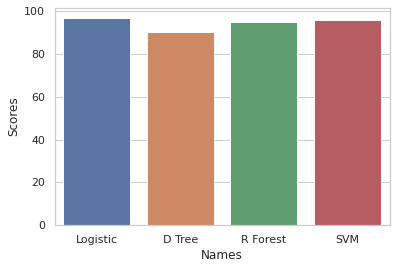

In [51]:
import seaborn as sns

sns.set(style='whitegrid')
ax = sns.barplot(x='Names',y='Scores',data=df)

In [ ]:
import pickle

pickle.dump(log,open('Logbc.pkl','wb'))